In [1]:
%cd '/content/drive/My Drive/ML/CS114.K21.KHTN/Final'

/content/drive/My Drive/ML/CS114.K21.KHTN/Final


#**7. Đánh giá trên bộ dữ liệu test một**

##**7.1 Import các thư viện cần thiết**

---



In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

import joblib
import numpy as np
import os
import cv2
import h5py
from keras import backend as K 
from keras.models import load_model

Using TensorFlow backend.


### **Hàm in ra confusion matrix**

In [ ]:
def plot_confusion_matrix(cls,X,y,
                          target_names=None,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):
    import itertools
    cm = confusion_matrix(y,cls.predict(X))    
    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy
 
    if cmap is None:
        cmap = plt.get_cmap('Blues')
 
    plt.figure(figsize=(15, 12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
 
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

### **Class name**

In [ ]:
class_name = ['Apple','Avocado','Banana','Coconut','Custard_apple',
                'Dragon_fruit','Guava','Mango','Orange','Plum',
                'Start_fruit','Watermelon']

##**7.2 Đánh giá model SVM trước khi tuning và sau khi tuning trên normal vector feature**

---



###**7.2.1 Load file data chứa các vector rút trích được lưu trữ trước đó**

In [ ]:
data_test_path = 'H5PY/test/test_normal.h5'
labels_test_path = 'H5PY/test/labels_test.h5'

In [ ]:
h5f_test = h5py.File(data_test_path, 'r')
h5f_labels = h5py.File(labels_test_path, 'r')

In [ ]:
data = h5f_test['dataset']
labels = h5f_labels['dataset']

In [ ]:
data = np.array(data)
labels = np.array(labels)

In [ ]:
h5f_test.close()
h5f_labels.close()

###**7.2.2 Chiều của dữ liệu và nhãn**

In [ ]:
data.shape

(2400, 3072)

In [ ]:
labels.shape

(2400,)

###**7.2.3 Load model trước khi tuning và sau khi tuning**

In [ ]:
model_path = 'H5PY/model/svm_normal.sav'
model_path_tuning = 'H5PY/model_tuning/svm_tuning_normal.sav'

In [ ]:
model = joblib.load(model_path)
model_tuning = joblib.load(model_path_tuning)

###**7.2.4 Kết quả dự đoán của model trước khi tuning và sau khi tuning**

####**Trước khi tuning**

In [ ]:
preds_before = model.predict(data)

In [ ]:
print(classification_report(labels, preds_before,
          target_names=class_name ))

               precision    recall  f1-score   support

        Apple       0.88      0.97      0.92       200
      Avocado       0.71      0.79      0.75       200
       Banana       0.94      0.94      0.94       200
      Coconut       0.93      0.91      0.92       200
Custard_apple       0.88      0.67      0.76       200
 Dragon_fruit       0.98      0.81      0.89       200
        Guava       0.76      0.78      0.77       200
        Mango       0.84      0.78      0.81       200
       Orange       0.73      0.95      0.83       200
         Plum       0.88      0.96      0.92       200
  Start_fruit       0.88      0.92      0.90       200
   Watermelon       0.83      0.69      0.76       200

     accuracy                           0.85      2400
    macro avg       0.85      0.85      0.85      2400
 weighted avg       0.85      0.85      0.85      2400



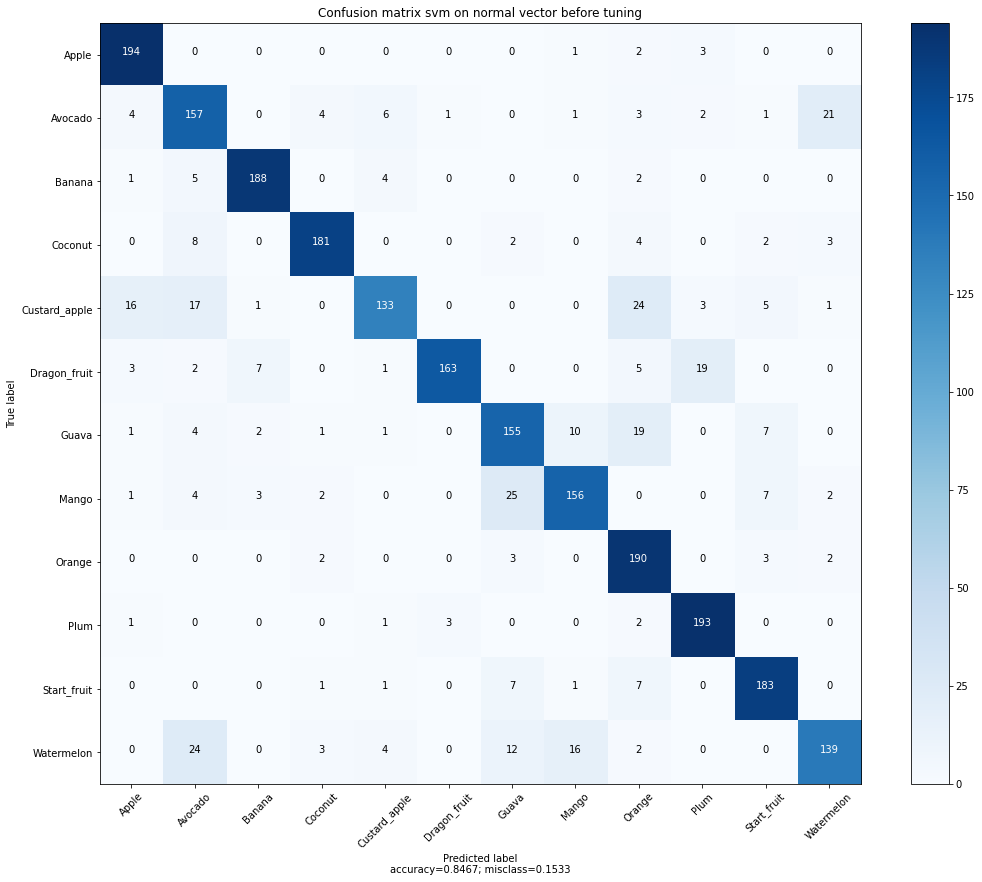

In [ ]:
plot_confusion_matrix(model,data,labels,class_name,title='Confusion matrix svm on normal vector before tuning')

####**Sau khi tuning**

In [ ]:
preds_after = model_tuning.predict(data)

In [ ]:
print(classification_report(labels, preds_after,
          target_names=class_name ))

               precision    recall  f1-score   support

        Apple       0.82      0.97      0.89       200
      Avocado       0.83      0.91      0.86       200
       Banana       0.91      0.95      0.93       200
      Coconut       0.97      0.95      0.96       200
Custard_apple       0.92      0.79      0.85       200
 Dragon_fruit       0.97      0.73      0.84       200
        Guava       0.83      0.79      0.81       200
        Mango       0.84      0.87      0.86       200
       Orange       0.79      0.94      0.85       200
         Plum       0.88      0.97      0.92       200
  Start_fruit       0.98      0.91      0.95       200
   Watermelon       0.93      0.83      0.88       200

     accuracy                           0.88      2400
    macro avg       0.89      0.88      0.88      2400
 weighted avg       0.89      0.88      0.88      2400



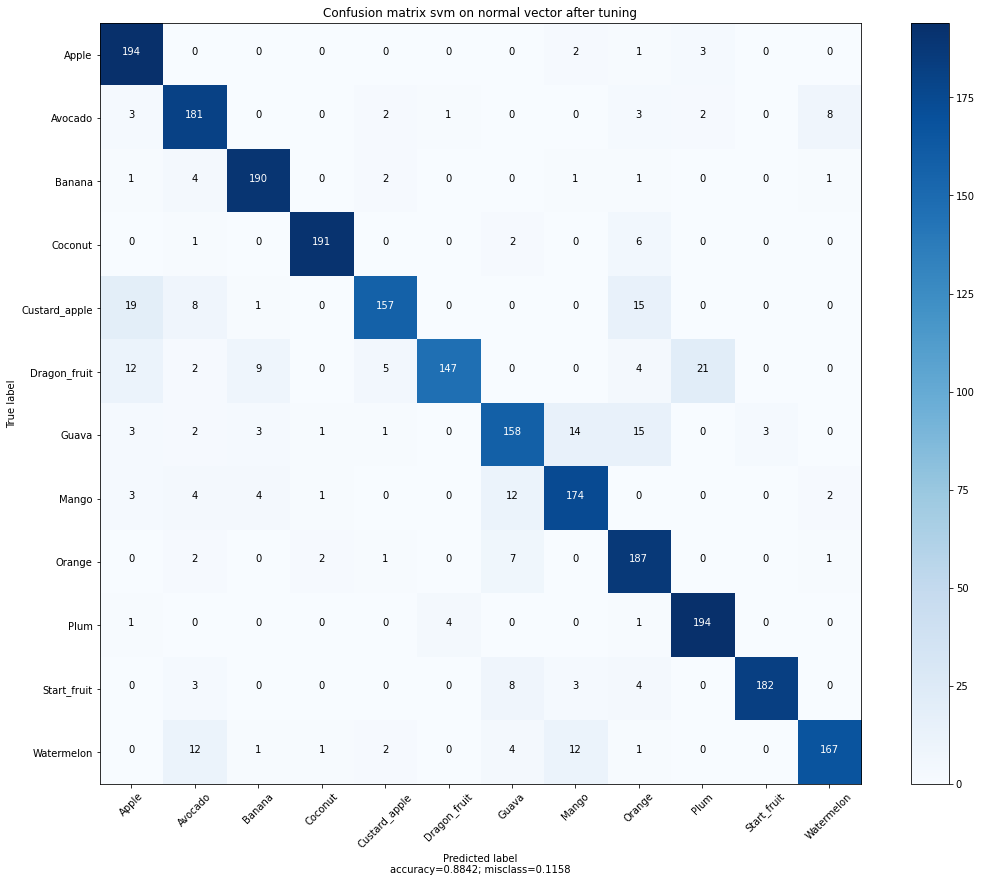

In [ ]:
plot_confusion_matrix(model_tuning,data,labels,class_name,title='Confusion matrix svm on normal vector after tuning')

###**7.2.5 Nhận xét**

- Trước khi Tuning: model SVM cho kết qua dự đoán của bộ dữ liệu có 3 class Custard_apple, Guava, Watermelon có độ chính xác f1 score nhỏ hơn 80%.
- Sau khi Tuning: model SVM đều cho kết quả dự đoán các class có độ chính xác f1 score lớn hơn 80% 
- Trên Confusion matrix, những ô không nằm trên đường chéo chính sau khi Tuning có giá trị nhỏ hơn, màu nhạt hơn trước khi Tuning

##**7.3 Đánh giá model KNN trước khi tuning và sau khi tuning trên local binary patterns vector feature**

---



###**7.3.1 Load file data chứa các vector rút trích được lưu trữ trước đó**

In [ ]:
data_test_path = 'H5PY/test/test_lbps.h5'
labels_test_path = 'H5PY/test/labels_test.h5'

In [ ]:
h5f_test = h5py.File(data_test_path, 'r')
h5f_labels = h5py.File(labels_test_path, 'r')

In [ ]:
data = h5f_test['dataset']
labels = h5f_labels['dataset']

In [ ]:
data = np.array(data)
labels = np.array(labels)

In [ ]:
h5f_test.close()
h5f_labels.close()

###**7.3.2 Chiều của dữ liệu và nhãn**

In [ ]:
data.shape

(2400, 26)

In [ ]:
labels.shape

(2400,)

###**7.3.3 Load model trước khi tuning và sau khi tuning**

In [ ]:
model_path = 'H5PY/model/knn_lbps.sav'
model_path_tuning = 'H5PY/model_tuning/knn_tuning_lbps.sav'

In [ ]:
model = joblib.load(model_path)
model_tuning = joblib.load(model_path_tuning)

###**7.3.4 Kết quả dự đoán của model trước khi tuning và sau khi tuning**

####**Trước khi tuning**

In [ ]:
preds_before = model.predict(data)

In [ ]:
print(classification_report(labels, preds_before,
          target_names=class_name ))


               precision    recall  f1-score   support

        Apple       0.37      0.62      0.46       200
      Avocado       0.27      0.37      0.31       200
       Banana       0.64      0.43      0.52       200
      Coconut       0.32      0.40      0.36       200
Custard_apple       0.31      0.59      0.41       200
 Dragon_fruit       0.36      0.38      0.37       200
        Guava       0.15      0.08      0.10       200
        Mango       0.36      0.17      0.24       200
       Orange       0.31      0.28      0.30       200
         Plum       0.38      0.29      0.33       200
  Start_fruit       0.47      0.23      0.31       200
   Watermelon       0.40      0.35      0.37       200

     accuracy                           0.35      2400
    macro avg       0.36      0.35      0.34      2400
 weighted avg       0.36      0.35      0.34      2400



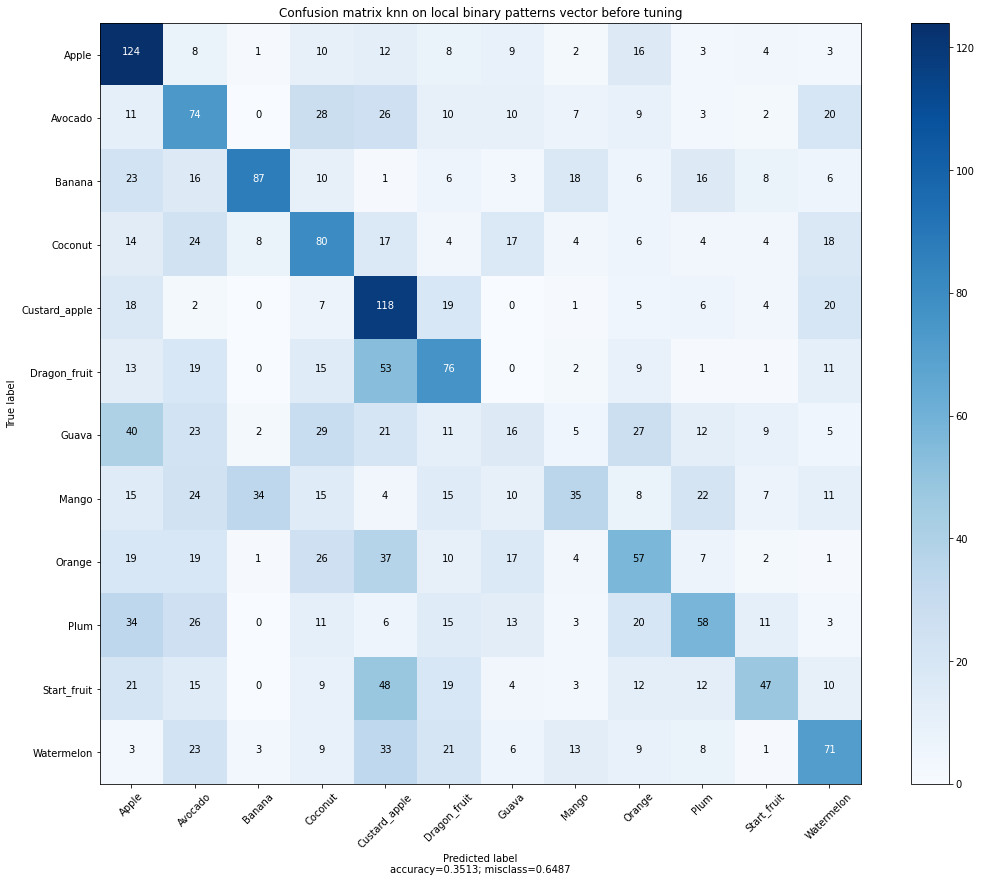

In [ ]:
plot_confusion_matrix(model,data,labels,class_name,title='Confusion matrix knn on local binary patterns vector before tuning')

####**Sau khi tuning**

In [ ]:
preds_after = model_tuning.predict(data)

In [ ]:
print(classification_report(labels, preds_after,
          target_names=class_name ))

               precision    recall  f1-score   support

        Apple       0.33      0.70      0.45       200
      Avocado       0.27      0.46      0.34       200
       Banana       0.54      0.47      0.50       200
      Coconut       0.39      0.55      0.46       200
Custard_apple       0.32      0.60      0.42       200
 Dragon_fruit       0.39      0.36      0.37       200
        Guava       0.18      0.11      0.14       200
        Mango       0.35      0.18      0.24       200
       Orange       0.30      0.27      0.28       200
         Plum       0.38      0.19      0.25       200
  Start_fruit       0.56      0.17      0.25       200
   Watermelon       0.53      0.20      0.28       200

     accuracy                           0.35      2400
    macro avg       0.38      0.35      0.33      2400
 weighted avg       0.38      0.35      0.33      2400



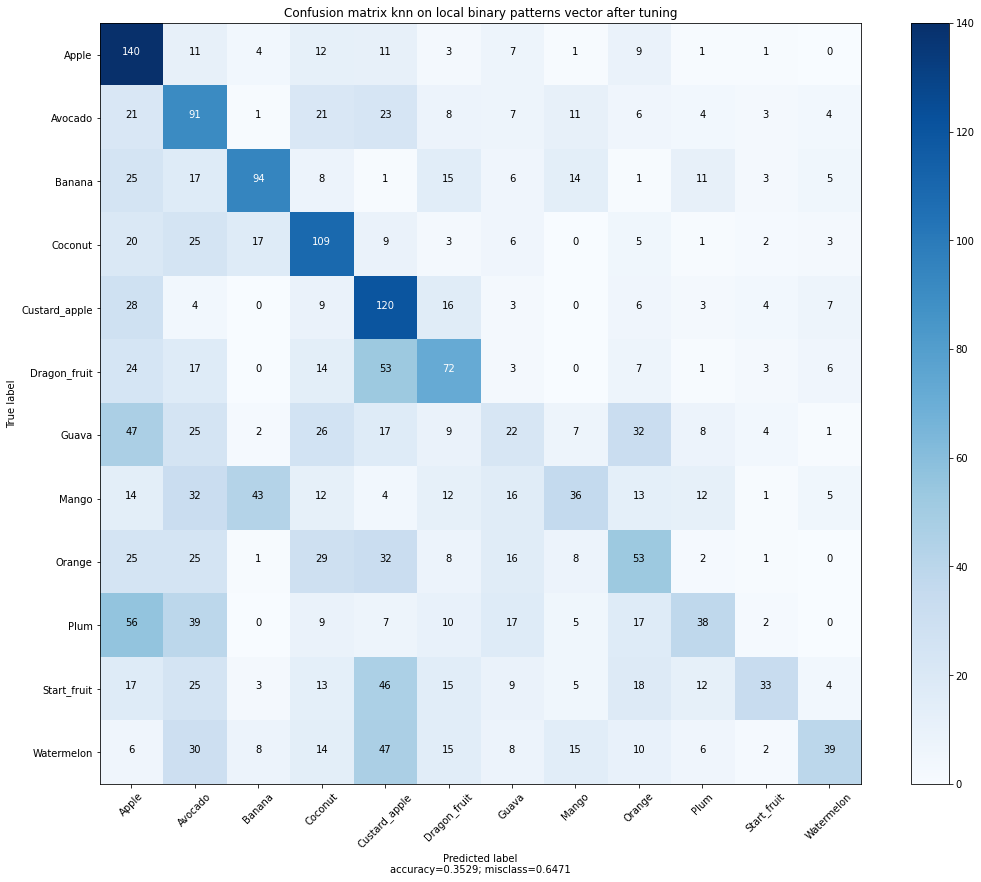

In [ ]:
plot_confusion_matrix(model_tuning,data,labels,class_name,title='Confusion matrix knn on local binary patterns vector after tuning')

###**7.3.5 Nhận xét**

+ Trước khi Tuning: trên đường chéo chính các ô có màu nhạt, f1-score của label Guava là 0.1 thấp hơn f1-score của các label khác.
+ Sau khi Tuning: f1-score của label Gauva là 0.14 có cải thiện hơn so với chưa tuning, mặc dù vậy nhưng model vẫn dự đoán sai nhiều.

##**7.4 Đánh giá model SVM trên histogram vector feature**

---



###**7.4.1 Load file data chứa các vector rút trích được lưu trữ trước đó**

In [ ]:
data_test_path = 'H5PY/test/test_hog.h5'
labels_test_path = 'H5PY/test/labels_test.h5'

In [ ]:
h5f_test = h5py.File(data_test_path, 'r')
h5f_labels = h5py.File(labels_test_path, 'r')

In [ ]:
data = h5f_test['dataset']
labels = h5f_labels['dataset']

In [ ]:
data = np.array(data)
labels = np.array(labels)

In [ ]:
h5f_test.close()
h5f_labels.close()

###**7.4.2 Chiều của dữ liệu và nhãn**

In [ ]:
data.shape

(2400, 144)

In [ ]:
labels.shape

(2400,)

###**7.4.3 Load model trước khi tuning và sau khi tuning**

In [ ]:
model_path = 'H5PY/model/svm_hog.sav'
model_path_tuning = 'H5PY/model_tuning/svm_tuning_hog.sav'

In [ ]:
model = joblib.load(model_path)
model_tuning = joblib.load(model_path_tuning)

###**7.4.4 Kết quả dự đoán của model trước khi tuning và sau khi tuning**

####**Trước khi tuning**

In [ ]:
preds_before = model.predict(data)

In [ ]:
print(classification_report(labels, preds_before,
          target_names=class_name ))

               precision    recall  f1-score   support

        Apple       0.68      0.76      0.72       200
      Avocado       0.53      0.61      0.56       200
       Banana       0.92      0.84      0.88       200
      Coconut       0.69      0.59      0.64       200
Custard_apple       0.67      0.82      0.74       200
 Dragon_fruit       0.68      0.87      0.76       200
        Guava       0.48      0.34      0.40       200
        Mango       0.58      0.29      0.39       200
       Orange       0.67      0.85      0.75       200
         Plum       0.65      0.81      0.72       200
  Start_fruit       0.82      0.66      0.73       200
   Watermelon       0.60      0.55      0.57       200

     accuracy                           0.67      2400
    macro avg       0.67      0.67      0.66      2400
 weighted avg       0.67      0.67      0.66      2400



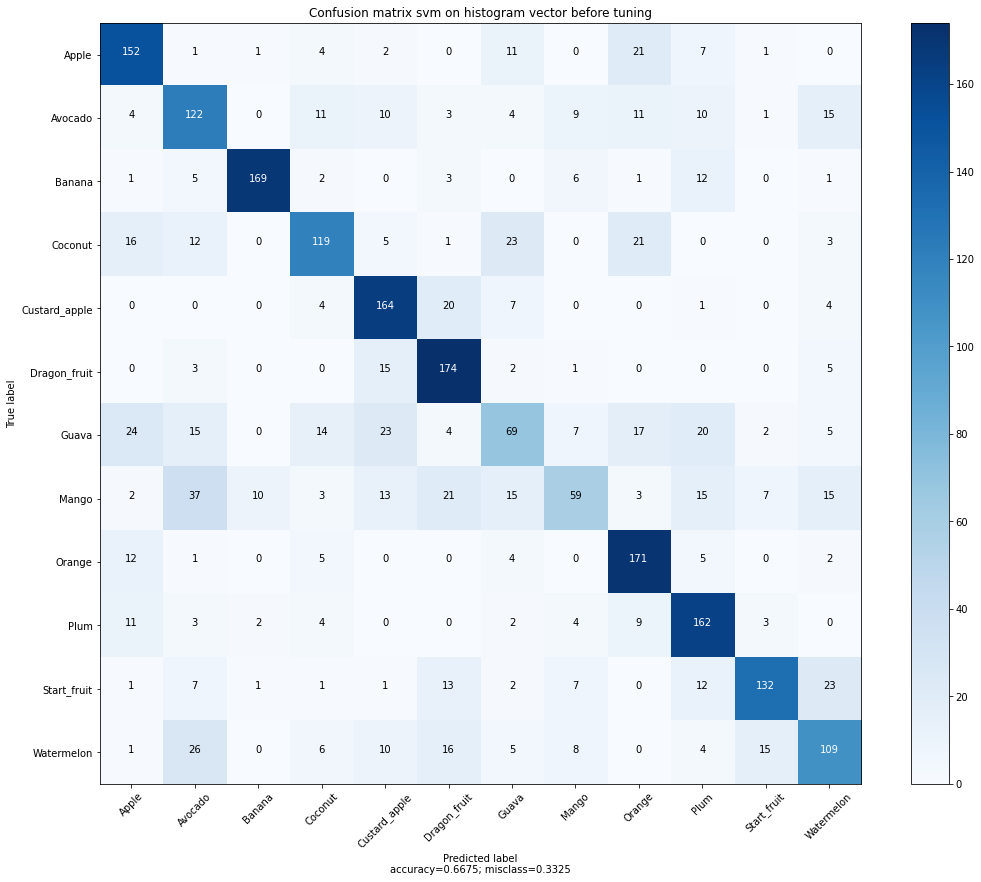

In [ ]:
plot_confusion_matrix(model,data,labels,class_name,title='Confusion matrix svm on histogram vector before tuning')

####**Sau khi tuning**

In [ ]:
preds_after = model_tuning.predict(data)

In [ ]:
print(classification_report(labels, preds_after,
          target_names=class_name ))

               precision    recall  f1-score   support

        Apple       0.60      0.73      0.66       200
      Avocado       0.36      0.41      0.38       200
       Banana       0.92      0.66      0.76       200
      Coconut       0.34      0.28      0.31       200
Custard_apple       0.38      0.64      0.48       200
 Dragon_fruit       0.49      0.88      0.63       200
        Guava       0.35      0.10      0.15       200
        Mango       0.42      0.04      0.07       200
       Orange       0.59      0.81      0.68       200
         Plum       0.53      0.69      0.60       200
  Start_fruit       0.64      0.29      0.40       200
   Watermelon       0.36      0.44      0.40       200

     accuracy                           0.50      2400
    macro avg       0.50      0.50      0.46      2400
 weighted avg       0.50      0.50      0.46      2400



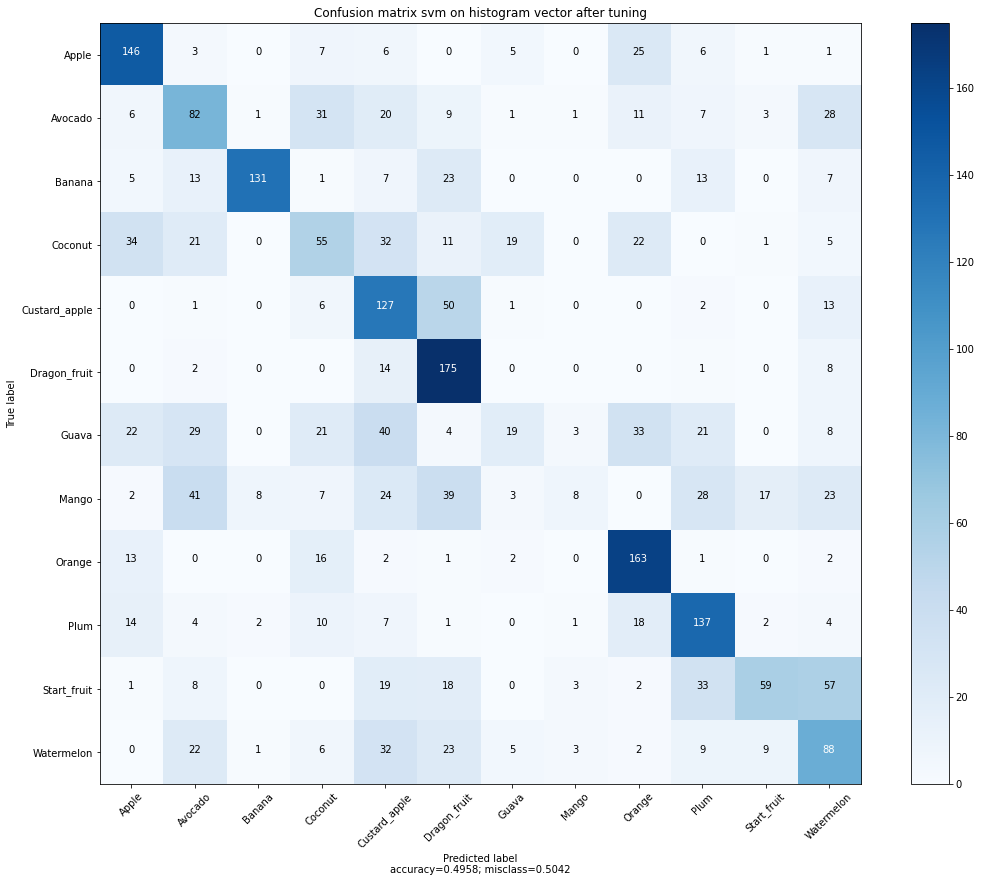

In [ ]:
plot_confusion_matrix(model_tuning,data,labels,class_name,title='Confusion matrix svm on histogram vector after tuning')

###**7.4.5 Nhận xét**

+ Trước khi Tuning: Trên đường chéo chính có các label được đoán đúng cao 

+ Sau khi Tuning: accuracy bị giảm, không còn chính xác giữa các label, một phần là do sử dụng RandomizedSearchCV không duyệt hết toàn bộ các tham só mà chỉ lấy ngẫu nhiên một số bộ, nên mặc dù khi đánh giá trên tập train cao nhưng có thể gây thấp cho tập Test 

##**7.5 Đánh giá model Shallownet**

---



###**7.5.1 Load file data đã được lưu trữ trước đó**

In [ ]:
path_data = 'H5PY/test/test_normal.h5'
path_label = 'H5PY/test/labels_test.h5'

In [ ]:
h5f_data  = h5py.File(path_data, 'r')
h5f_label = h5py.File(path_label, 'r')

In [ ]:
data = h5f_data['dataset']
labels = h5f_label['dataset']

In [ ]:
data = np.array(data)
labels = np.array(labels)

In [ ]:
h5f_test.close()
h5f_labels.close()

###**7.5.3 Resize vectore sang dạng ma trận (m,n,d)**

In [ ]:
if K.image_data_format() == "channels_first":
    data = data.reshape(data.shape[0],3,32,32)
else:
    data = data.reshape(data.shape[0],32,32,3)

###**7.5.4 Chuyển đổi nhãn thành vector**

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

###**7.5.5 Chiều của dữ liệu và nhãn**

In [ ]:
data.shape

(2400, 32, 32, 3)

In [ ]:
labels.shape

(2400, 12)

###**7.5.6 Load model Shallownet**

In [ ]:
model_path_shallownet = 'H5PY/model/shallownet_weights.hdf5'

In [ ]:
model_shallownet = load_model(model_path_shallownet)

###**7.5.6 Kết quả dự đoán của model**

In [ ]:
preds = model_shallownet.predict(data)

In [ ]:
print("[INFO] evaluating network...")
preds = model_shallownet.predict(data)
print(classification_report(labels.argmax(axis=1),
                preds.argmax(axis=1),
                target_names=class_name))

[INFO] evaluating network...
               precision    recall  f1-score   support

        Apple       0.80      0.96      0.87       200
      Avocado       0.87      0.77      0.82       200
       Banana       0.90      0.90      0.90       200
      Coconut       0.96      0.96      0.96       200
Custard_apple       0.94      0.82      0.88       200
 Dragon_fruit       0.97      0.71      0.82       200
        Guava       0.82      0.87      0.84       200
        Mango       0.85      0.79      0.82       200
       Orange       0.76      0.92      0.83       200
         Plum       0.92      0.98      0.95       200
  Start_fruit       0.95      0.95      0.95       200
   Watermelon       0.88      0.90      0.89       200

     accuracy                           0.88      2400
    macro avg       0.88      0.88      0.88      2400
 weighted avg       0.88      0.88      0.88      2400



###**7.5.7 Nhận xét**

- Khi đánh giá bộ dữ liệu test trên mạng neural network (mạng 2 lớp), độ chính xác khi dự đoán bằng với khi đánh giá trên model SVM dùng với vector đặc trưng thông thường sau khi tuning  (đều bằng 88%) 

##**7.6 Đánh giá model Lenet**

---



###**7.6.1 Load model Lenet**

In [ ]:
model_path_lenet = 'H5PY/model/lenet_weights.hdf5'

In [ ]:
model_lenet = load_model(model_path_lenet)

###**7.6.2 Kết quả dự đoán của model**

In [ ]:
preds = model_lenet.predict(data)

In [ ]:
print("[INFO] evaluating network...")
preds = model_lenet.predict(data)
print(classification_report(labels.argmax(axis=1),
                preds.argmax(axis=1),
                target_names=class_name))

[INFO] evaluating network...
               precision    recall  f1-score   support

        Apple       0.97      0.97      0.97       200
      Avocado       0.92      0.93      0.93       200
       Banana       0.94      0.99      0.97       200
      Coconut       0.96      0.96      0.96       200
Custard_apple       0.98      0.94      0.96       200
 Dragon_fruit       0.98      0.89      0.93       200
        Guava       0.92      0.86      0.89       200
        Mango       0.92      0.92      0.92       200
       Orange       0.88      0.96      0.92       200
         Plum       0.91      0.98      0.94       200
  Start_fruit       0.96      0.93      0.94       200
   Watermelon       0.95      0.94      0.95       200

     accuracy                           0.94      2400
    macro avg       0.94      0.94      0.94      2400
 weighted avg       0.94      0.94      0.94      2400



###**7.6.3 Nhận xét**

- Xây mạng Lenet với số lớp nhiều lớp hơn (2 layer (Convolution + maxpooling) và 2 layer fully connected layer và output là softmax layer ), độ chính xác khi đánh giá trên tập test tăng lên 94% so với 88% so với mạng Shallownet (mạng 2 lớp)